In [6]:
import nltk
import sklearn
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import csv
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## read the files ##
train = pd.read_csv("../data/ALYT_train.csv")
test  = pd.read_csv("../data/ALYT_test.csv")

## Split the data into X and Y
X_train = train['comment']
X_test = test['comment']
y_train = train['label']
y_test = test['label']

# TF-IDF Feature
tfidf_vectorizer = TfidfVectorizer()
X_train_vec = tfidf_vectorizer.fit_transform(X_train)
X_test_vec = tfidf_vectorizer.transform(X_test)
joblib.dump(tfidf_vectorizer, '../model/svm/alyt_tfidf_vectorizer.pkl')

['../model/svm/alyt_tfidf_vectorizer.pkl']

In [3]:
## declaring classifier and training ## 
clf =  LinearSVC(max_iter=2000)
clf.fit(X_train_vec, y_train)
# joblib.dump(clf, 'svm_model.pkl')
# loaded_model = joblib.load('svm_model.pkl')
joblib.dump(clf, '../model/svm/alyt_svm_model.pkl')

C:\Users\Widya\anaconda3\envs\thesis\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


['../model/svm/alyt_svm_model.pkl']

In [36]:
df_x = pd.read_csv("../predictions/ALYT_NO_svm_tf.csv")
df_x['label'].value_counts()
df_x.head()

,comment,label,pred
0,so its the babies that are sexist i knew it al...,NOT,NOT
1,seeing it from the perspective of the millers ...,NOT,NOT
2,her face and attiude scream meath addict,ABU,NOT
3,i really try to be as loving and compassionate...,NOT,NOT
4,im so happy for you trish try to stay on this ...,NOT,NOT


              precision    recall  f1-score   support

         ABU       0.62      0.35      0.45       682
         NOT       0.92      0.97      0.94      5137

    accuracy                           0.90      5819
   macro avg       0.77      0.66      0.70      5819
weighted avg       0.88      0.90      0.89      5819




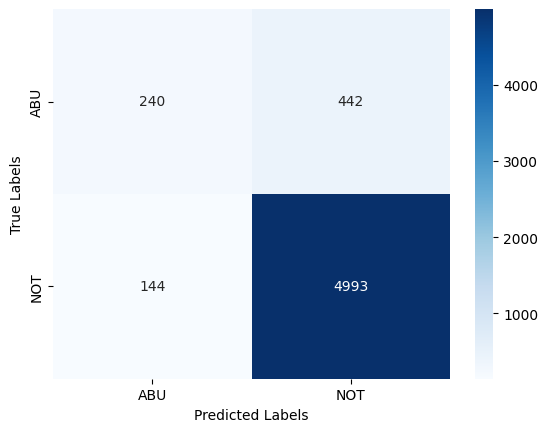

In [31]:
## prediction ##
# predicted_label = clf.predict(X_test_vec)
# test['pred'] = predicted_label.tolist()
# test.to_csv('../predictions/ALYT_NO_svm_tf.csv', index = False)

df = pd.read_csv("../predictions/ALYT_NO_svm_tf.csv")
y_gold = df["label"]
y_pred = df["pred"]
report = classification_report(y_gold, y_pred, digits=2)
print(report)
print()
confusion_matrix_data = sklearn.metrics.confusion_matrix(y_gold, y_pred)
cm = sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
classes = ['ABU', 'NOT']
cm.set_xticklabels(classes)
cm.set_yticklabels(classes)
plt.show()

# Prediction on Obfuscated set

In [32]:
#load model and vectorizer#
loaded_model = joblib.load('../model/svm/alyt_svm_model.pkl')
loaded_tfidf_vectorizer = joblib.load('../model/svm/alyt_tfidf_vectorizer.pkl')

In [33]:
def predict(file_path, model, vectorizer):
    df = pd.read_csv(file_path)
    X = df['obfuscated_comment']
    X_vec = vectorizer.transform(X)
    predicted_label = model.predict(X_vec)
    df['pred'] = predicted_label.tolist()
    return df

def generate_classification_report(df):
    y_gold = df["label"]
    y_pred = df["pred"]
    report = classification_report(y_gold, y_pred, digits=2)
    confusion_matrix_data = sklearn.metrics.confusion_matrix(y_gold, y_pred)
    cm = sns.heatmap(confusion_matrix_data, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    classes = ['ABU', 'NOT']
    cm.set_xticklabels(classes)
    cm.set_yticklabels(classes)
    plt.show()
    return report  

def evaluate(data_path, model, vectorizer, save=True):
    df_pred = predict(data_path, model, vectorizer)
    if save:
        output_file = f'{os.path.basename(data_path).split(".")[0]}_pred.csv'
        output_path = f'../predictions/alyt_obf/{output_file}'    
        df_pred.to_csv(output_path, index=False)
    print(generate_classification_report(df_pred))

Classification report for ALYT_OBF_1interleave.csv


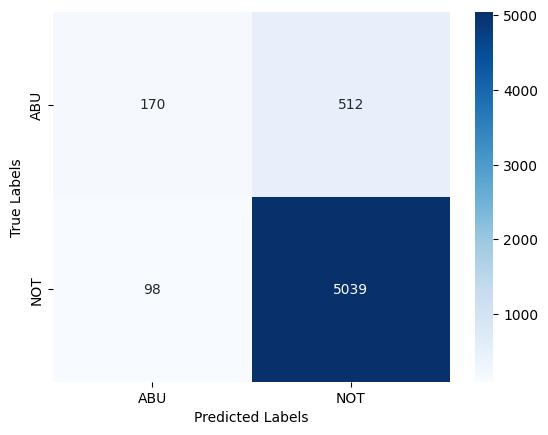

              precision    recall  f1-score   support

         ABU       0.63      0.25      0.36       682
         NOT       0.91      0.98      0.94      5137

    accuracy                           0.90      5819
   macro avg       0.77      0.62      0.65      5819
weighted avg       0.88      0.90      0.87      5819


Classification report for ALYT_OBF_2swapchar.csv


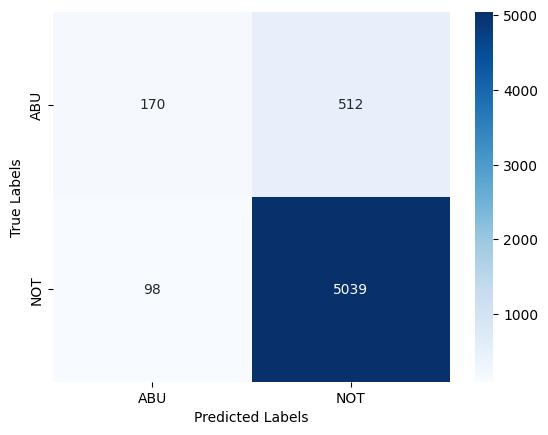

              precision    recall  f1-score   support

         ABU       0.63      0.25      0.36       682
         NOT       0.91      0.98      0.94      5137

    accuracy                           0.90      5819
   macro avg       0.77      0.62      0.65      5819
weighted avg       0.88      0.90      0.87      5819


Classification report for ALYT_OBF_3replace_o.csv


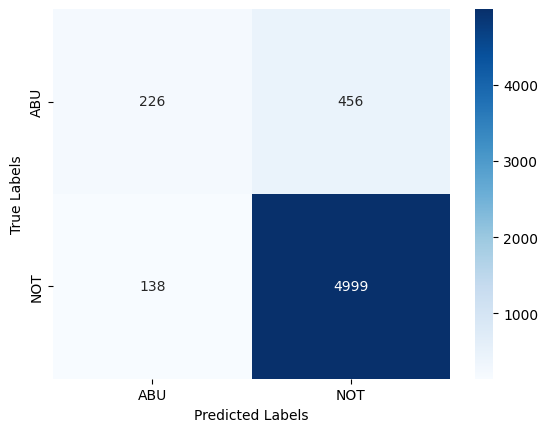

              precision    recall  f1-score   support

         ABU       0.62      0.33      0.43       682
         NOT       0.92      0.97      0.94      5137

    accuracy                           0.90      5819
   macro avg       0.77      0.65      0.69      5819
weighted avg       0.88      0.90      0.88      5819


Classification report for ALYT_OBF_4ommit_char.csv


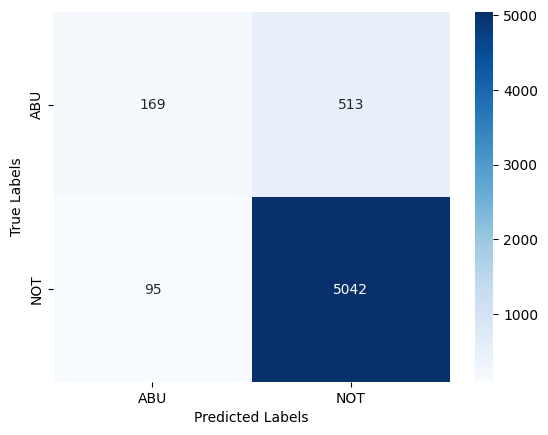

              precision    recall  f1-score   support

         ABU       0.64      0.25      0.36       682
         NOT       0.91      0.98      0.94      5137

    accuracy                           0.90      5819
   macro avg       0.77      0.61      0.65      5819
weighted avg       0.88      0.90      0.87      5819


Classification report for ALYT_OBF_5extra_char.csv


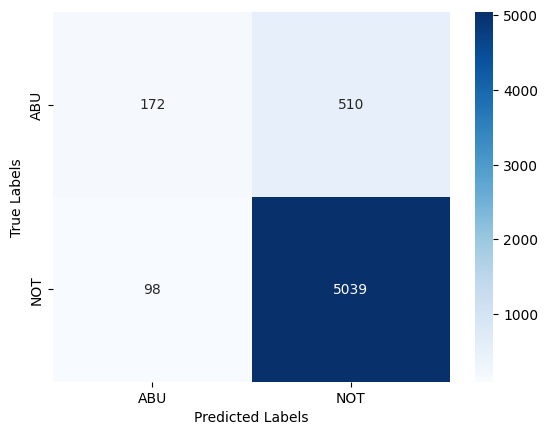

              precision    recall  f1-score   support

         ABU       0.64      0.25      0.36       682
         NOT       0.91      0.98      0.94      5137

    accuracy                           0.90      5819
   macro avg       0.77      0.62      0.65      5819
weighted avg       0.88      0.90      0.87      5819


Classification report for ALYT_OBF_6to_asterisks.csv


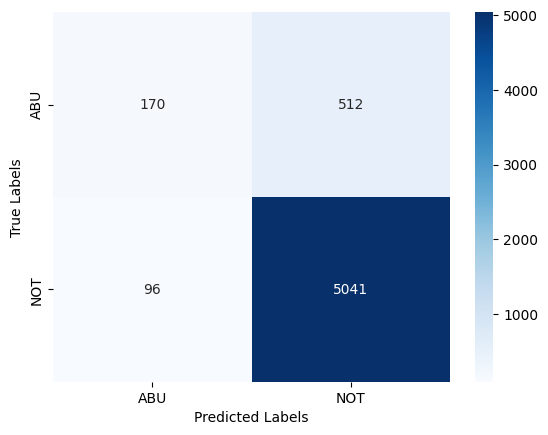

              precision    recall  f1-score   support

         ABU       0.64      0.25      0.36       682
         NOT       0.91      0.98      0.94      5137

    accuracy                           0.90      5819
   macro avg       0.77      0.62      0.65      5819
weighted avg       0.88      0.90      0.87      5819


Classification report for ALYT_OBF_7duplicate_char.csv


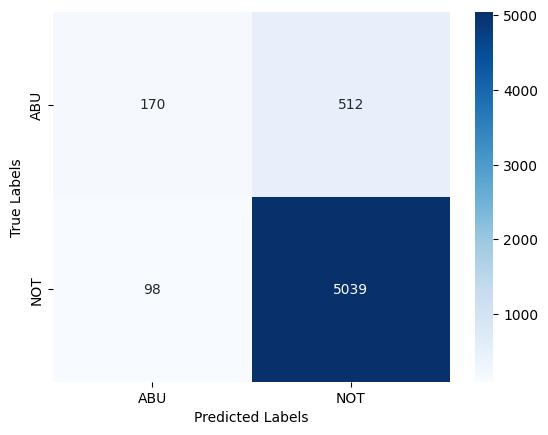

              precision    recall  f1-score   support

         ABU       0.63      0.25      0.36       682
         NOT       0.91      0.98      0.94      5137

    accuracy                           0.90      5819
   macro avg       0.77      0.62      0.65      5819
weighted avg       0.88      0.90      0.87      5819


Classification report for ALYT_OBF_8random_obf.csv


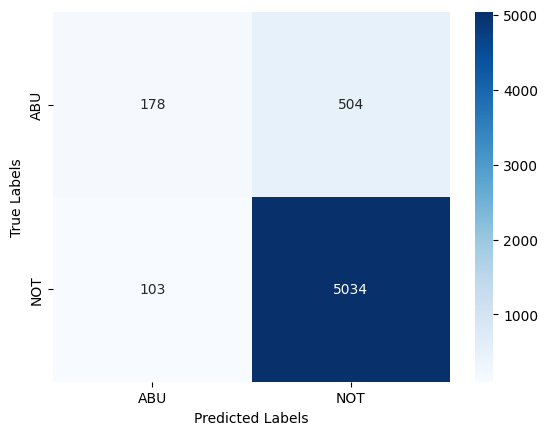

              precision    recall  f1-score   support

         ABU       0.63      0.26      0.37       682
         NOT       0.91      0.98      0.94      5137

    accuracy                           0.90      5819
   macro avg       0.77      0.62      0.66      5819
weighted avg       0.88      0.90      0.88      5819




In [34]:
# df_pred = predict('../data/alyt_obf/ALYT_OBF_1interleave.csv', loaded_model, loaded_tfidf_vectorizer)
# print("Classification report for 'interleave space'")
# print()
# print(generate_classification_report(df_pred))

path_data = '../data/alyt_obf/'
for f in os.listdir(path_data):
    if f.endswith('.csv'):
        print(f"Classification report for {f}")
        evaluate(os.path.join(path_data, f), loaded_model, loaded_tfidf_vectorizer)
        print()